## Bank Churn Binary Classification
Done by
Divyam 
[Github](http://https://github.com/divyam6969)

#### This project involves building a predictive model using XGBoost to identify potential customer churn in a financial dataset. The process includes preprocessing steps like handling missing values and outliers, as well as one-hot encoding categorical variables. The trained model is evaluated on a test set, and predictions are saved to a CSV file. The project output provides a detailed breakdown of churn predictions by customer segments, offering insights into the model's performance.

#### For users interested in replicating or extending the project, the README file serves as a concise guide, detailing project structure, dependencies, and usage instructions. Overall, this work contributes to customer relationship management by employing machine learning to proactively detect and address potential churn in a financial context.

## Reading the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')


In [5]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [7]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


So now we have read the data now we will explore it

## Exploring / Pre Processing Data

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


#### Removing negative values (in Age and Balance now)

In [9]:
# Assuming 'Balance' and 'Age' are the columns where negative values should be removed
train_data = train_data[(train_data['Balance'] >= 0) & (train_data['Age'] >= 0)]


In [10]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### removing the outliers

In [11]:
# Calculate IQR excluding the last column ("Exited")
Q1 = train_data.iloc[:, :-1].select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = train_data.iloc[:, :-1].select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = (
    (train_data.iloc[:, :-1].select_dtypes(include=['float64', 'int64']) < lower_fence) | 
    (train_data.iloc[:, :-1].select_dtypes(include=['float64', 'int64']) > upper_fence)
).any(axis=1)

# Remove outliers
train_data = train_data[~outliers]


In [12]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,119224.000000,1.192240e+05,119224.000000,119224.000000,119224.000000,119224.000000,119224.000000,119224.0,119224.000000,119224.000000,119224.000000
mean,82380.600139,1.569171e+07,656.764091,37.053163,5.032904,54569.726376,1.553135,1.0,0.483997,112841.919416,0.197905
std,47653.958577,7.145154e+04,78.510607,7.316201,2.797893,62731.209592,0.529696,0.0,0.499746,50049.780016,0.398422
min,0.000000,1.556570e+07,428.000000,18.000000,0.000000,0.000000,1.000000,1.0,0.000000,11.580000,0.000000
25%,41072.500000,1.563285e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.0,0.000000,74850.670000,0.000000
50%,82408.500000,1.568962e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.0,0.000000,118969.640000,0.000000
75%,123629.250000,1.575675e+07,710.000000,41.000000,7.000000,119782.232500,2.000000,1.0,1.000000,155061.970000,0.000000
max,165033.000000,1.581569e+07,850.000000,57.000000,10.000000,250898.090000,3.000000,1.0,1.000000,199992.480000,1.000000


#### now i would replace the null values with the mean

In [13]:
# Extract numeric columns excluding the last column ("Exited")
numeric_columns = train_data.iloc[:, :-1].select_dtypes(include=['float64', 'int64']).columns

# Calculate column-wise means excluding the last column ("Exited")
column_means = train_data.iloc[:, :-1][numeric_columns].mean()

# Create a copy of the selected columns and fill null values with the corresponding mean
train_data[numeric_columns] = train_data[numeric_columns].copy().fillna(column_means)


#### Now removing the null values for non numeric columns

In [14]:
train_data.dropna(inplace=True)

In [15]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,119224.000000,1.192240e+05,119224.000000,119224.000000,119224.000000,119224.000000,119224.000000,119224.0,119224.000000,119224.000000,119224.000000
mean,82380.600139,1.569171e+07,656.764091,37.053163,5.032904,54569.726376,1.553135,1.0,0.483997,112841.919416,0.197905
std,47653.958577,7.145154e+04,78.510607,7.316201,2.797893,62731.209592,0.529696,0.0,0.499746,50049.780016,0.398422
min,0.000000,1.556570e+07,428.000000,18.000000,0.000000,0.000000,1.000000,1.0,0.000000,11.580000,0.000000
25%,41072.500000,1.563285e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.0,0.000000,74850.670000,0.000000
50%,82408.500000,1.568962e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.0,0.000000,118969.640000,0.000000
75%,123629.250000,1.575675e+07,710.000000,41.000000,7.000000,119782.232500,2.000000,1.0,1.000000,155061.970000,0.000000
max,165033.000000,1.581569e+07,850.000000,57.000000,10.000000,250898.090000,3.000000,1.0,1.000000,199992.480000,1.000000


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119224 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               119224 non-null  int64  
 1   CustomerId       119224 non-null  int64  
 2   Surname          119224 non-null  object 
 3   CreditScore      119224 non-null  int64  
 4   Geography        119224 non-null  object 
 5   Gender           119224 non-null  object 
 6   Age              119224 non-null  float64
 7   Tenure           119224 non-null  int64  
 8   Balance          119224 non-null  float64
 9   NumOfProducts    119224 non-null  int64  
 10  HasCrCard        119224 non-null  float64
 11  IsActiveMember   119224 non-null  float64
 12  EstimatedSalary  119224 non-null  float64
 13  Exited           119224 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 13.6+ MB


Now we have removed the faaltu ki values and our data is preprocessed now, now we would train the data and test it on test_csv file

#### Plotting the data to see if there's any outlier

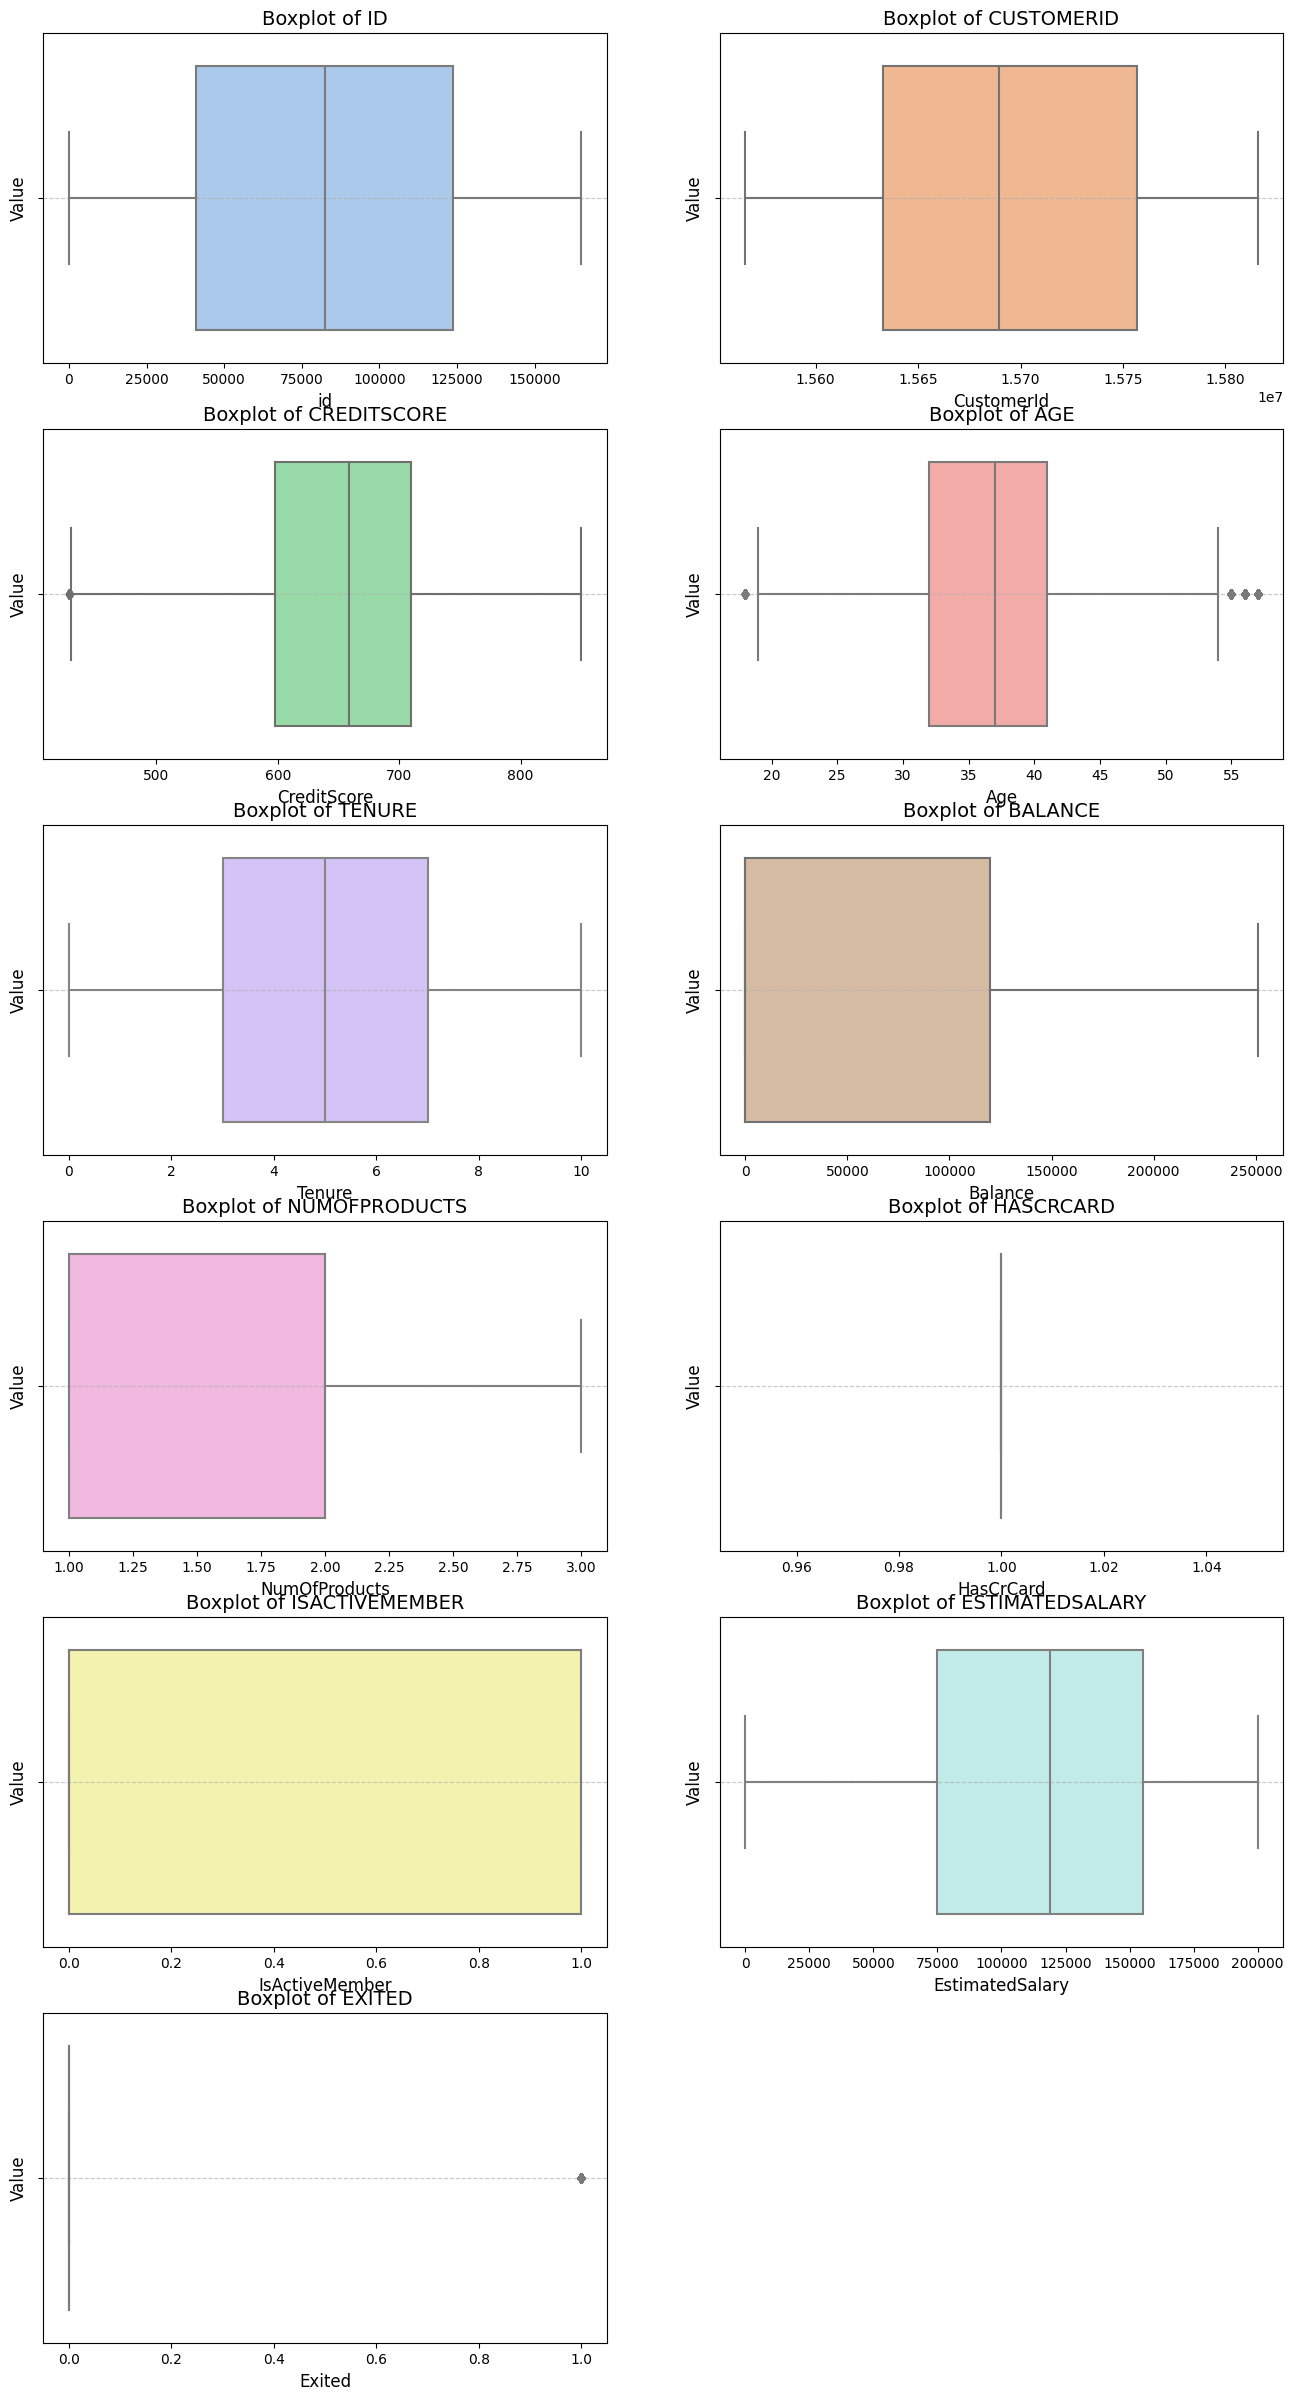

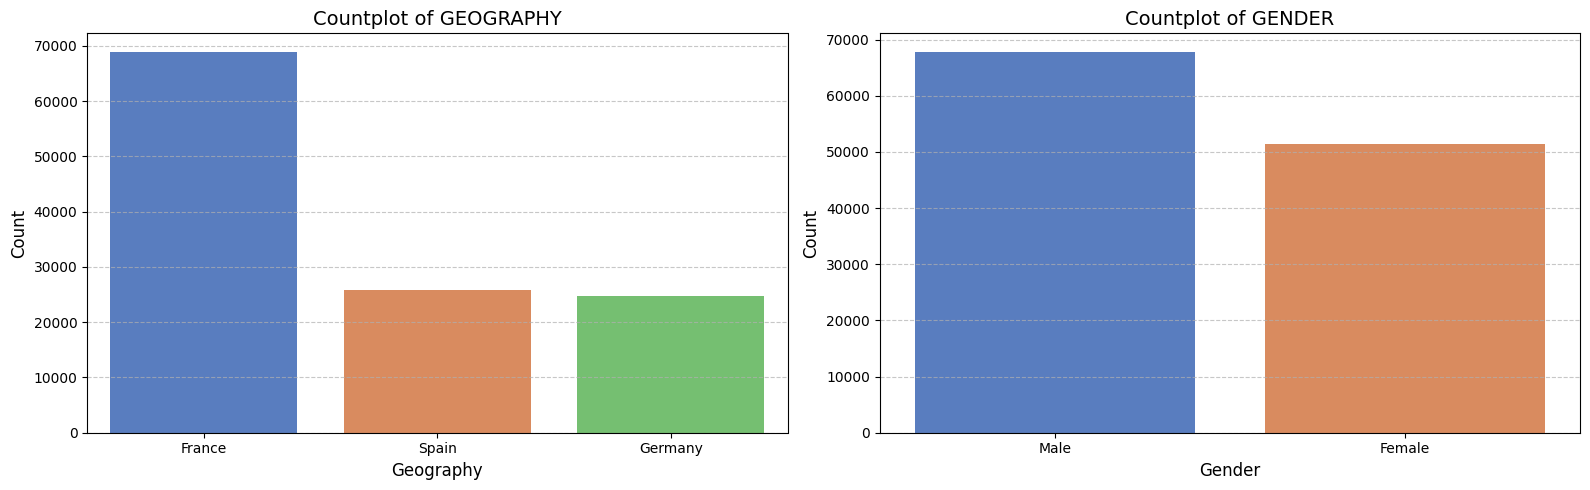

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming train_data is your cleaned DataFrame
# ...

# Assuming continuous_features and categorical_features are lists of column names
continuous_features = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['Geography', 'Gender']  # Update with your actual categorical columns

# Set up the subplots
num_cols_continuous = len(continuous_features)
num_cols_categorical = len(categorical_features)

num_rows_continuous = math.ceil(num_cols_continuous / 2)
num_rows_categorical = math.ceil(num_cols_categorical / 2)

# Set up the subplots for continuous features
fig, ax = plt.subplots(num_rows_continuous, 2, figsize=(16, 5 * num_rows_continuous))

# Choose a suitable color palette
box_color_palette = sns.color_palette("pastel")

for i, col in enumerate(continuous_features):
    # Create a boxplot using sns.boxplot with styling
    sns.boxplot(data=train_data, x=col, color=box_color_palette[i % len(box_color_palette)], ax=ax.flatten()[i])
    
    ax.flatten()[i].set_title(f'Boxplot of {str(col).upper()}', fontsize=14)
    ax.flatten()[i].set_xlabel(col, fontsize=12)
    ax.flatten()[i].set_ylabel('Value', fontsize=12)
    
    # Add grid for better readability
    ax.flatten()[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any empty subplots
for j in range(i + 1, num_rows_continuous * 2):
    fig.delaxes(ax.flatten()[j])

# Set up the subplots for categorical features
fig, ax = plt.subplots(num_rows_categorical, 2, figsize=(16, 5 * num_rows_categorical))

# Choose a suitable color palette
countplot_color_palette = sns.color_palette("muted")

for i, col in enumerate(categorical_features):
    # Create a countplot using sns.countplot with styling
    sns.countplot(x=col, data=train_data, palette=countplot_color_palette, ax=ax.flatten()[i])
    
    ax.flatten()[i].set_title(f'Countplot of {str(col).upper()}', fontsize=14)
    ax.flatten()[i].set_xlabel(col, fontsize=12)
    ax.flatten()[i].set_ylabel('Count', fontsize=12)
    
    # Add grid for better readability
    ax.flatten()[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any empty subplots
for j in range(i + 1, num_rows_categorical * 2):
    fig.delaxes(ax.flatten()[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Now we would train the data using different models and choose the model whose accuracy is the best and test the data on train_csv

## Data Modelling

In [18]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [19]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [20]:
print(train_data.describe())

                  id    CustomerId    CreditScore            Age  \
count  119224.000000  1.192240e+05  119224.000000  119224.000000   
mean    82380.600139  1.569171e+07     656.764091      37.053163   
std     47653.958577  7.145154e+04      78.510607       7.316201   
min         0.000000  1.556570e+07     428.000000      18.000000   
25%     41072.500000  1.563285e+07     598.000000      32.000000   
50%     82408.500000  1.568962e+07     659.000000      37.000000   
75%    123629.250000  1.575675e+07     710.000000      41.000000   
max    165033.000000  1.581569e+07     850.000000      57.000000   

              Tenure        Balance  NumOfProducts  HasCrCard  IsActiveMember  \
count  119224.000000  119224.000000  119224.000000   119224.0   119224.000000   
mean        5.032904   54569.726376       1.553135        1.0        0.483997   
std         2.797893   62731.209592       0.529696        0.0        0.499746   
min         0.000000       0.000000       1.000000        1.0  

In [21]:
print(test_data.describe())

                  id    CustomerId    CreditScore            Age  \
count  110023.000000  1.100230e+05  110023.000000  110023.000000   
mean   220045.000000  1.569210e+07     656.530789      38.122205   
std     31761.048671  7.168499e+04      80.315415       8.861550   
min    165034.000000  1.556570e+07     350.000000      18.000000   
25%    192539.500000  1.563286e+07     597.000000      32.000000   
50%    220045.000000  1.569018e+07     660.000000      37.000000   
75%    247550.500000  1.575693e+07     710.000000      42.000000   
max    275056.000000  1.581569e+07     850.000000      92.000000   

              Tenure        Balance  NumOfProducts      HasCrCard  \
count  110023.000000  110023.000000  110023.000000  110023.000000   
mean        4.996637   55333.611354       1.553321       0.753043   
std         2.806148   62788.519675       0.544714       0.431244   
min         0.000000       0.000000       1.000000       0.000000   
25%         3.000000       0.000000       

In [22]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# KNearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier 

# Support Vector Machine
from sklearn.svm import SVC

# Neural Network 
from sklearn.neural_network import MLPClassifier
from tensorflow import keras

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier  

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Ensembles
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier

# Separate features (X) and target variable (y)
X = train_data.drop(columns=['Exited'])  # Exclude the target variable
y = train_data['Exited']


#### Training the model using XGBClassfier Model

In [23]:

# Define categorical and numeric features
categorical_features = ['Surname', 'Geography', 'Gender']
numeric_features = [col for col in X.columns if col not in categorical_features]


In [24]:

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



In [25]:

# Combine the preprocessor with the classifier in a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', XGBClassifier())])

# Split the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming 'y' is a continuous variable
threshold = 0.5  # set your desired threshold

# Ensure the indices are aligned
y_binary = (y_train > threshold).astype(int)

# Train the model
pipeline.fit(X_train, y_binary)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['id', 'CustomerId',
                                                   'CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Surname', 'Geography',
                                                   'Gender'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, ca...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [26]:
test_predictions = pipeline.predict(test_data)
train_predictions = pipeline.predict(X_train)  # Assuming X_train is the feature matrix used for training

# Assuming 'y_train' is the target variable used for training
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy}')
# Save the predictions to a CSV file
predictions_df = pd.DataFrame({'id': test_data['id'], 'Exited': test_predictions})
predictions_df.to_csv('Prediction.csv', index=False)


Training Accuracy: 0.8869667327189423


In [27]:
sub = pd.DataFrame()
sub["id"] = test_data['id']
sub["Exited"] = pipeline.predict_proba(test_data)[:,1]

sub.to_csv("submission.csv",header=True,index=False)
sub

,id,Exited
0,165034,0.014662
1,165035,0.825478
2,165036,0.019682
3,165037,0.201591
4,165038,0.305500
...,...,...
110018,275052,0.036138
110019,275053,0.171985
110020,275054,0.012970
110021,275055,0.140656
